In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data=pd.read_excel('C:/Users/Amos/Desktop/MC251361/Python/Ep_raw.xlsx')

In [3]:
df=data
y = df['Ep'].copy()
X = df.drop('Ep', axis=1)

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from skopt import BayesSearchCV
from lightgbm import LGBMRegressor

# 将数据分为训练集和测试集（80% 训练，20% 测试）
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=63)

# 定义 LightGBM 回归模型
model = LGBMRegressor(random_state=42)

# 定义待优化的参数空间
param_space = {
    'n_estimators': (50, 300),              # 树的数量
    'max_depth': (5, 20),                   # 树的最大深度
    'learning_rate': (0.01, 0.3, 'log-uniform'),  # 学习率
    'num_leaves': (20, 150),                # 叶节点数量
    'min_child_samples': (5, 50),           # 叶节点的最小样本数
    'subsample': (0.6, 1.0),                # 数据采样比例
    'colsample_bytree': (0.6, 1.0)          # 每棵树使用的特征比例
}

# 创建贝叶斯优化的搜索器
opt = BayesSearchCV(
    model, param_space, n_iter=100, scoring='neg_mean_squared_error', cv=5, n_jobs=-1, verbose=1, random_state=42
)

# 执行优化
opt.fit(X_train, y_train)

# 输出最佳参数和最佳得分
print(f'Best parameters: {opt.best_params_}')

# 使用最佳参数进行预测
best_model = opt.best_estimator_
y_pred = best_model.predict(X_test)

# 计算 RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Test RMSE: {rmse}')


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

In [4]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from lightgbm import LGBMRegressor
from math import sqrt

# Define model parameters
param_space = {
    'n_estimators': 177,
    'max_depth': 5,
    'learning_rate': 0.07809765271680998,
    'num_leaves': 150,
    'min_child_samples': 5,
    'subsample': 0.6,
    'colsample_bytree': 0.6
}

# Initialize LightGBM model
LGBM = LGBMRegressor(**param_space, random_state=42)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=63)

# Train the model
LGBM.fit(X_train, y_train)

# Make predictions
y_pred_train = LGBM.predict(X_train)
y_pred_test = LGBM.predict(X_test)

# Calculate R2 and RMSE for train and test sets
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)
rmse_train = sqrt(mean_squared_error(y_train, y_pred_train))
rmse_test = sqrt(mean_squared_error(y_test, y_pred_test))

# Print results
print(f'Train R2: {r2_train}')
print(f'Train RMSE: {rmse_train}')
print(f'Test R2: {r2_test}')
print(f'Test RMSE: {rmse_test}')


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000234 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 854
[LightGBM] [Info] Number of data points in the train set: 648, number of used features: 23
[LightGBM] [Info] Start training from score 256.683151
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

Text(0.05, 0.95, 'R²: 0.98')

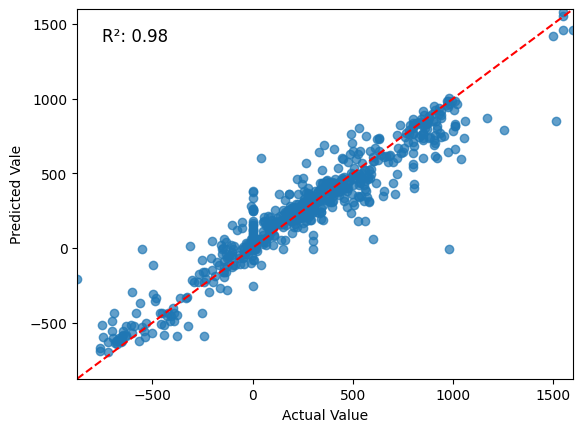

In [5]:
#Train stage
plt.scatter(y_train, y_pred_train, alpha=0.7)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], color='red', linestyle='--')
plt.xlabel('Actual Value')
plt.ylabel('Predicted Vale')
plt.xlim([y.min(), y.max()])
plt.ylim([y.min(), y.max()])
plt.text(0.05, 0.95, f'R²: {(0.98):.2f}', transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')

Text(0.05, 0.95, 'R²: 0.85')

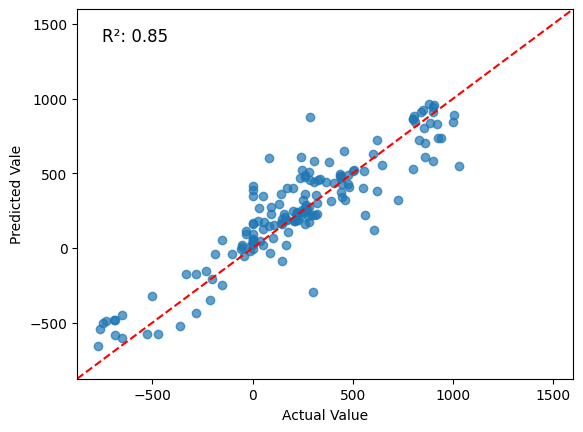

In [6]:
#Test stage
plt.scatter(y_test, y_pred_test, alpha=0.7)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], color='red', linestyle='--')
plt.xlabel('Actual Value')
plt.ylabel('Predicted Vale')
plt.xlim([y.min(), y.max()])
plt.ylim([y.min(), y.max()])
plt.text(0.05, 0.95, f'R²: {(0.85):.2f}', transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')

C:\Users\Amos\AppData\Local\Temp\ipykernel_8696\3887559651.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=importances_df, palette="viridis")


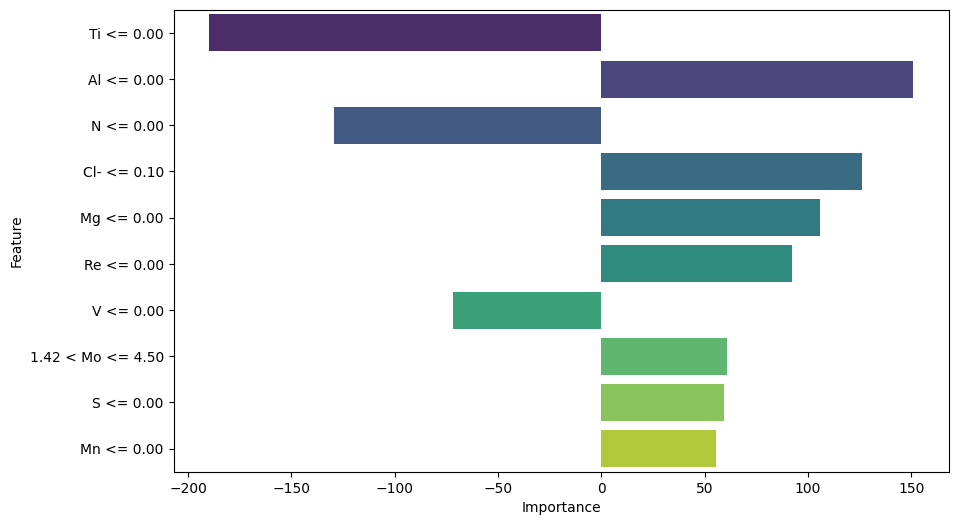

In [7]:
import lime
import lime.lime_tabular
import seaborn as sns
import matplotlib.pyplot as plt

# 创建LIME解释器对象
explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=X_train.values,  # 训练数据
    training_labels=y_train.values,  # 训练标签
    mode='regression',  # 设置为回归模型
    feature_names=X_train.columns,  # 特征名称
    class_names=['Prediction'],  # 预测的目标
    discretize_continuous=True  # 连续特征离散化
)

# 选择测试集中的一个样本进行解释（例如第一个样本）
i = 88
sample = X_test.iloc[i]

# 生成解释
explanation = explainer.explain_instance(sample.values, LGBM.predict)

# 提取特征的重要性（即每个特征对该样本预测的影响）
feature_importances = explanation.as_list()

# 可视化该样本的特征重要性
importances = [imp[1] for imp in feature_importances]  # 提取每个特征的重要性分数
features = [imp[0] for imp in feature_importances]  # 提取特征名称

# 将特征重要性转换为DataFrame，方便可视化
importances_df = pd.DataFrame(list(zip(features, importances)), columns=["Feature", "Importance"])

# 绘制条形图，展示该样本的特征重要性
plt.figure(figsize=(10, 6))
sns.barplot(x="Importance", y="Feature", data=importances_df, palette="viridis")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

C:\Users\Amos\AppData\Local\Temp\ipykernel_8696\2728359292.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=importances_df, palette="viridis")


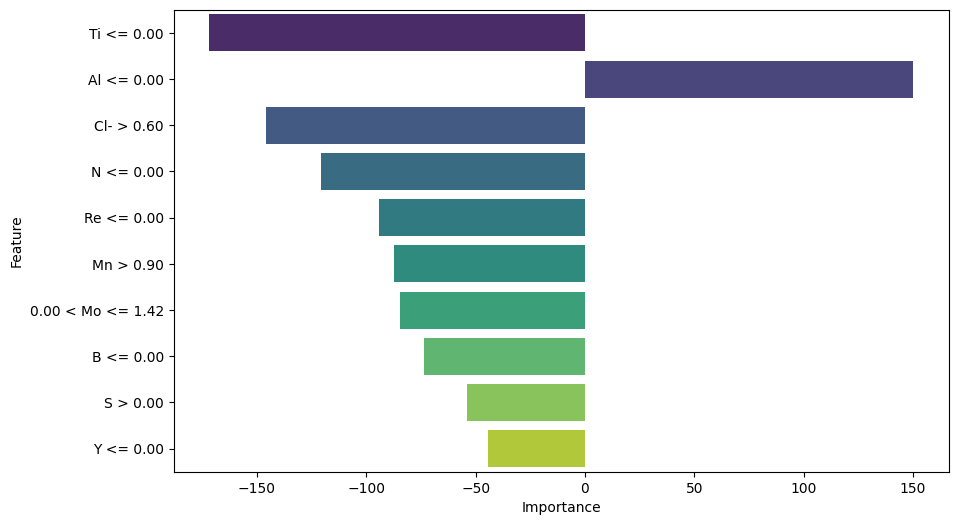

In [8]:
# 选择测试集中的一个样本进行解释（例如第一个样本）
i = 11
sample = X_test.iloc[i]

# 生成解释
explanation = explainer.explain_instance(sample.values, LGBM.predict)

# 提取特征的重要性（即每个特征对该样本预测的影响）
feature_importances = explanation.as_list()

# 可视化该样本的特征重要性
importances = [imp[1] for imp in feature_importances]  # 提取每个特征的重要性分数
features = [imp[0] for imp in feature_importances]  # 提取特征名称

# 将特征重要性转换为DataFrame，方便可视化
importances_df = pd.DataFrame(list(zip(features, importances)), columns=["Feature", "Importance"])

# 绘制条形图，展示该样本的特征重要性
plt.figure(figsize=(10, 6))
sns.barplot(x="Importance", y="Feature", data=importances_df, palette="viridis")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

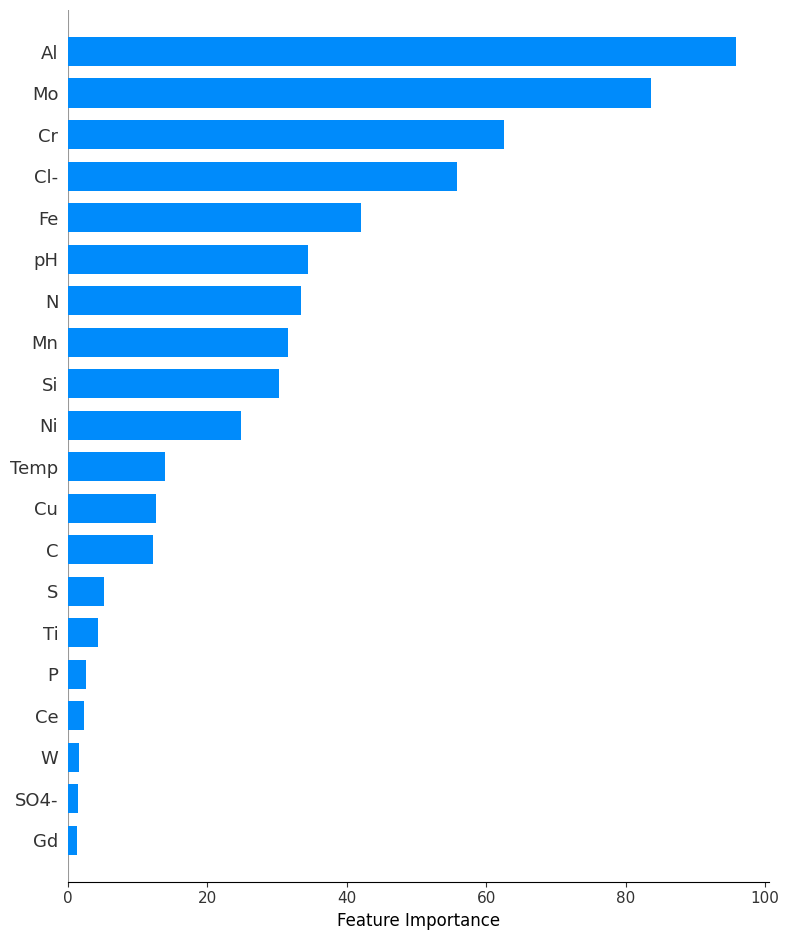

In [9]:
import shap
import numpy as np
import matplotlib.pyplot as plt

# 使用SHAP的TreeExplainer来解释模型
explainer = shap.TreeExplainer(LGBM)  # 使用训练好的 LGBM 模型

# 计算训练集的 SHAP 值
shap_values = explainer.shap_values(X_train)

# 计算 SHAP 值的绝对值
shap_values_abs = np.abs(shap_values)

# 绘制 SHAP 绝对值条形图
shap.summary_plot(shap_values_abs, X_train, plot_type="bar", show=False)

# 修改横坐标标题
plt.xlabel('Feature Importance', fontsize=12)

# 显示修改后的图形
plt.show()


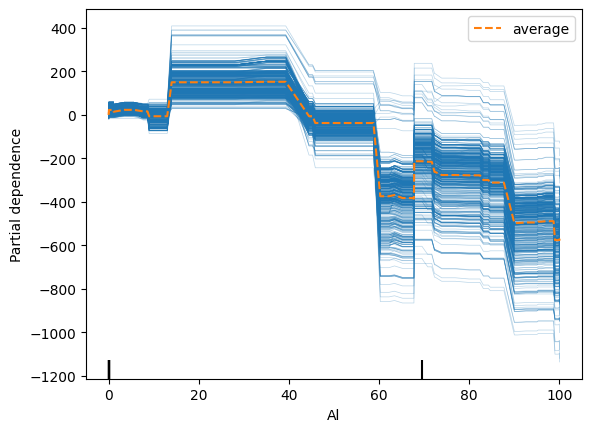

In [10]:
from sklearn.inspection import PartialDependenceDisplay

# 定义部分依赖图的特征
features_info = {
    "features": ['Al'],  # 特征列表（可以在此添加更多特征）
    "kind": "both",      # 显示平均和个体的部分依赖图
    "centered": True    # 是否对部分依赖进行中心化
}

# 显示部分依赖图
display = PartialDependenceDisplay.from_estimator(
    LGBM,              # 训练好的模型
    X_train,            # 训练数据
    **features_info,    # 传递特征信息
    percentiles=(0, 1), # 百分位范围（0到1代表数据的全范围）
    grid_resolution=100 # 网格分辨率，值越大图像越平滑
)

PyALE._ALE_generic:INFO: Continuous feature detected.


Text(0.5, 1.0, '')

<Figure size 6000x6000 with 0 Axes>

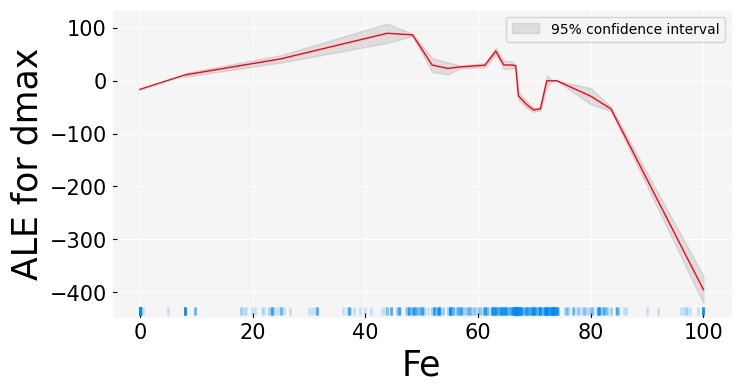

In [11]:
from PyALE import ale
plt.figure(figsize=(15,15),dpi=400)

from matplotlib import cycler
# cycler
colors = plt.cycler(color=['#FF0011', 'b', '#9988DD','#EECC55', '#88BB44', '#FFBBBB'])

plt.rc('axes', facecolor='#F5F5F5', edgecolor='w',axisbelow=True, grid=True, prop_cycle=colors)
plt.rc('grid', color='w', linestyle='solid')
plt.rc('patch', edgecolor='#E6E6E6')
plt.rc('xtick', direction='in', color='black')
plt.rc('ytick', direction='in', color='black')
plt.rc('lines', linewidth=1, markeredgewidth=2,markeredgecolor='#008BFB')

ale_eff = ale(
    X=X, model=LGBM, feature=["Fe"], grid_size=30, include_CI=True,C=0.95
)

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel("Fe",fontsize=25,color='black')
plt.ylabel("ALE for dmax",fontsize=25,color='black')
plt.title("",fontsize=20)

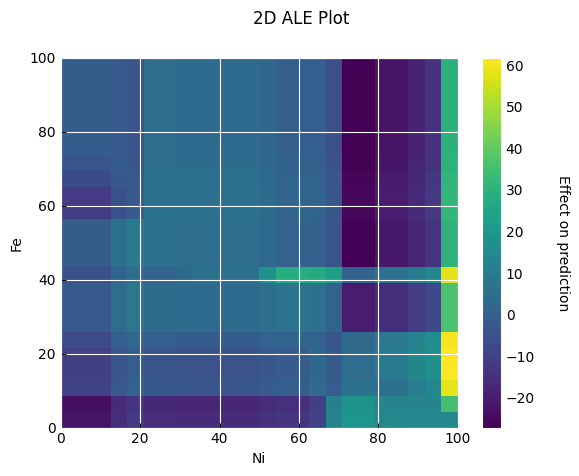

In [14]:

ale_eff_2d = ale(
    X=X, model=LGBM, feature=["Fe", "Ni"], grid_size=30, include_CI=True, C=0.95
)

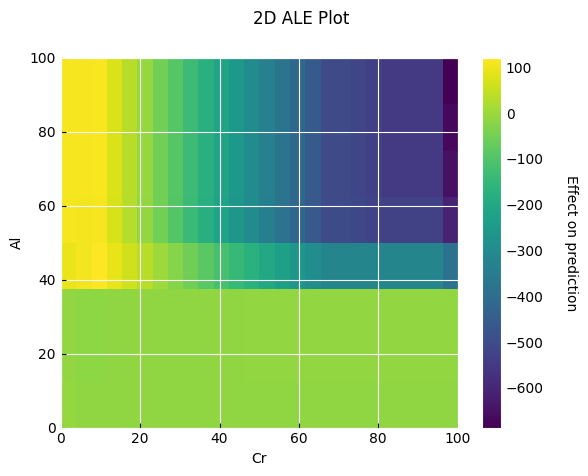

In [15]:

ale_eff_2d = ale(
    X=X, model=LGBM, feature=["Al", "Cr"], grid_size=30, include_CI=True, C=0.95
)